In [13]:
# Created By Venujan Malaiyandi
# BSCP|CS|61|101
# For Task 9.1P
# Cyber Security Analytics

In [14]:
import numpy as np
import matplotlib.pyplot as plt

Loading datatset 

In [15]:
# Load Data

from sklearn.datasets import load_digits
digits = load_digits()
x = digits.data
y = digits.target


Understanding the dataset

In [16]:
x.shape

(1797, 64)

In [17]:
y.shape

(1797,)

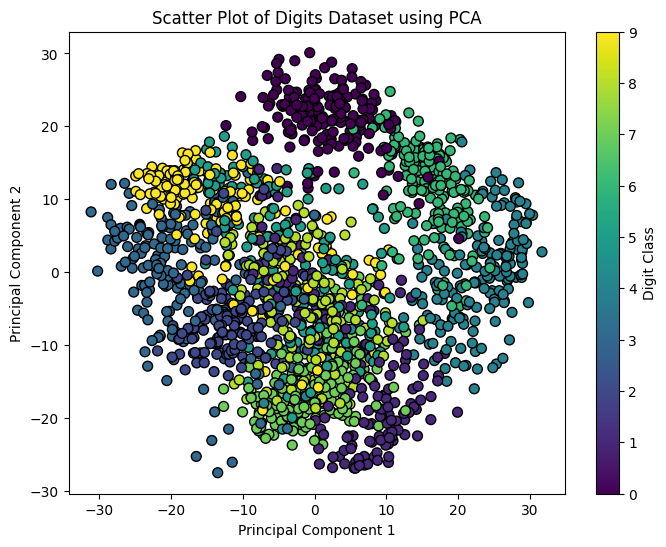

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# Create a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.colorbar(scatter, label='Digit Class')
plt.title('Scatter Plot of Digits Dataset using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

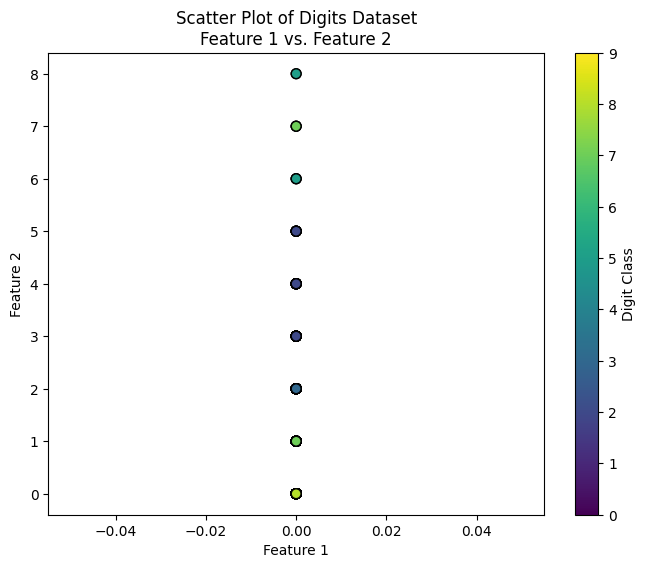

In [19]:
# Choose two features 
feature1_index = 0
feature2_index = 1

# Create a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x[:, feature1_index], x[:, feature2_index], c=y, cmap='viridis', edgecolor='k', s=50)
plt.colorbar(scatter, label='Digit Class')
plt.title(f'Scatter Plot of Digits Dataset\nFeature {feature1_index + 1} vs. Feature {feature2_index + 1}')
plt.xlabel(f'Feature {feature1_index + 1}')
plt.ylabel(f'Feature {feature2_index + 1}')
plt.show()


In [20]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

Splitting data

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
x_train.shape, x_test.shape

((1347, 64), (450, 64))

Intiating SVM

In [22]:
from sklearn.svm import SVC 
svm = SVC(kernel='rbf')

Param grid


In [23]:

param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100] }

Using grid search to find the best 'c' and 'gamma'

In [24]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, return_train_score=True  )
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [25]:
# Get information from grid_search the grid search
print("Parameter grid:\n", param_grid)
print("Best Test Score:", grid_search.score(x_test, y_test))
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_.get_params())

Parameter grid:
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best Test Score: 0.9933333333333333
Best Parameters: {'C': 10, 'gamma': 0.001}
Best Cross-Validation Score: 0.9918353297535452
Best Estimator: {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
